In [2]:
import pandas as pd

In [4]:
df=pd.read_csv(r"C:\Users\PHANEENDRA\Downloads\Cranes ML\vehicle-2.csv")
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [6]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [10]:
float_cols=[]
for col in df.columns:
    if df[col].dtype=='float64':
        float_cols.append(col)

In [12]:
float_cols

['circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'scaled_radius_of_gyration.1',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2']

In [14]:
for i in float_cols:
    df[i]=df[i].fillna(df[i].mean())

In [16]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

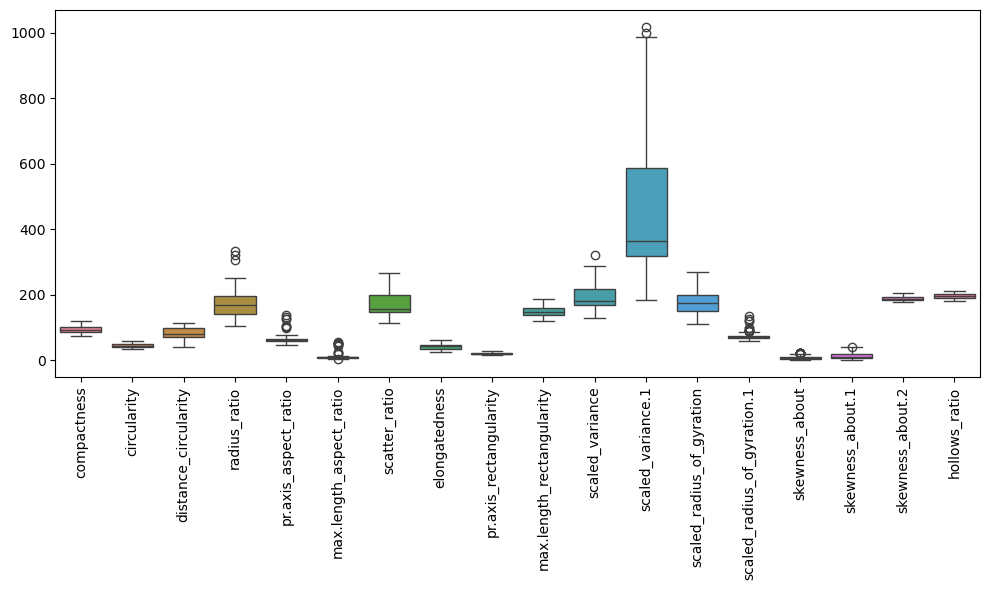

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [20]:
x=df.drop(columns=['class'])
y=df['class']

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [58]:
# from sklearn.preprocessing import LabelEncoder
# encoder=LabelEncoder()
# y=encoder.fit_transform(y)

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.2,random_state=1)

# Raw SVM

In [26]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(xtrain,ytrain)

SVC()

In [28]:
svc.score(xtrain,ytrain)

0.9807692307692307

In [30]:
svc.score(xtest,ytest)       #This is raw performance just after scaling

0.9588235294117647

# SVM after PCA 

In [32]:
from sklearn.decomposition import PCA
pca=PCA()
xpca=pca.fit_transform(x_scaled)

<Axes: >

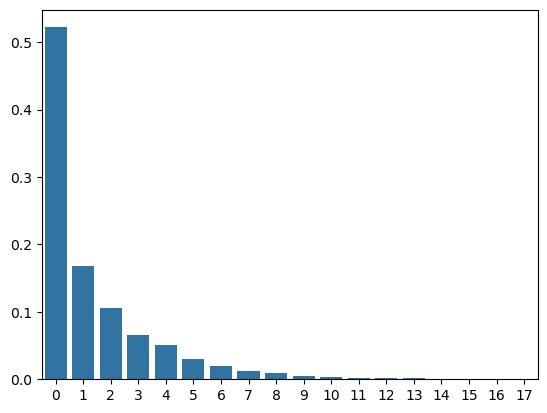

In [34]:
sns.barplot(pca.explained_variance_ratio_)

In [103]:
pca2=PCA(n_components=9)        #11 means it will ake principal components from 0 to 10
xpca2=pca2.fit_transform(x_scaled)

In [105]:
xpca2[:5]

array([[ 0.3323932 ,  0.21863838,  1.00128619, -0.17732785,  0.07910624,
         0.75481358, -0.90218666,  0.38335828, -0.86896421],
       [-1.59374091,  0.4205494 , -0.3692643 , -0.23348408,  0.69339724,
         0.5190731 ,  0.37623423, -0.24762406,  0.14654177],
       [ 3.76753509, -0.19504077,  0.08823723, -1.20312936,  0.73090652,
        -0.70537687, -0.03264225, -0.4834385 , -0.30888846],
       [-1.74075313,  2.82957904,  0.10917606, -0.37752174, -0.36348321,
         0.48786321,  0.46861329,  0.02212938, -0.0292698 ],
       [ 0.55523862, -4.75755702, 11.70358777, -0.14506812,  3.25765146,
         0.21164905,  2.67119138,  0.44638009,  2.09048784]])

In [107]:
xtrain2,xtest2,ytrain2,ytest2=train_test_split(xpca2,y,test_size=0.2,random_state=1)

In [109]:
svc2=SVC()

In [111]:
svc2.fit(xtrain2,ytrain2)

SVC()

In [113]:
svc2.score(xtrain2,ytrain2)

0.9718934911242604

In [115]:
svc2.score(xtest2,ytest2)      #this is the performance after PCA

0.9588235294117647

# Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [100]:
lr.score(xtest,ytest)

0.9411764705882353

In [117]:
lr.fit(xtrain2,ytrain2)

LogisticRegression()

In [119]:
lr.score(xtest2,ytest2)

0.8823529411764706

# KNN

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [124]:
knn.score(xtest,ytest)

0.9294117647058824

In [126]:
knn.fit(xtrain2,ytrain2)

KNeighborsClassifier()

In [128]:
knn.score(xtest2,ytest2)

0.9176470588235294

# Naive Bayes

In [131]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xtrain,ytrain)

GaussianNB()

In [133]:
nb.score(xtest,ytest)

0.5941176470588235

In [135]:
nb.fit(xtrain2,ytrain2)

GaussianNB()

In [137]:
nb.score(xtest2,ytest2)

0.8117647058823529

# DT

In [140]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier().fit(xtrain,ytrain)

In [142]:
dt.score(xtest,ytest)

0.8470588235294118

In [144]:
dt.fit(xtrain2,ytrain2)

DecisionTreeClassifier()

In [146]:
dt.score(xtest2,ytest2)

0.8294117647058824

# RFC

In [149]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier().fit(xtrain,ytrain)


In [151]:
rfc.score(xtest,ytest)

0.9352941176470588

In [153]:
rfc.fit(xtrain2,ytrain2)

RandomForestClassifier()

In [155]:
rfc.score(xtest2,ytest2)

0.9294117647058824